2024-08-25 11:10:42.335975: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading models and setting up ...


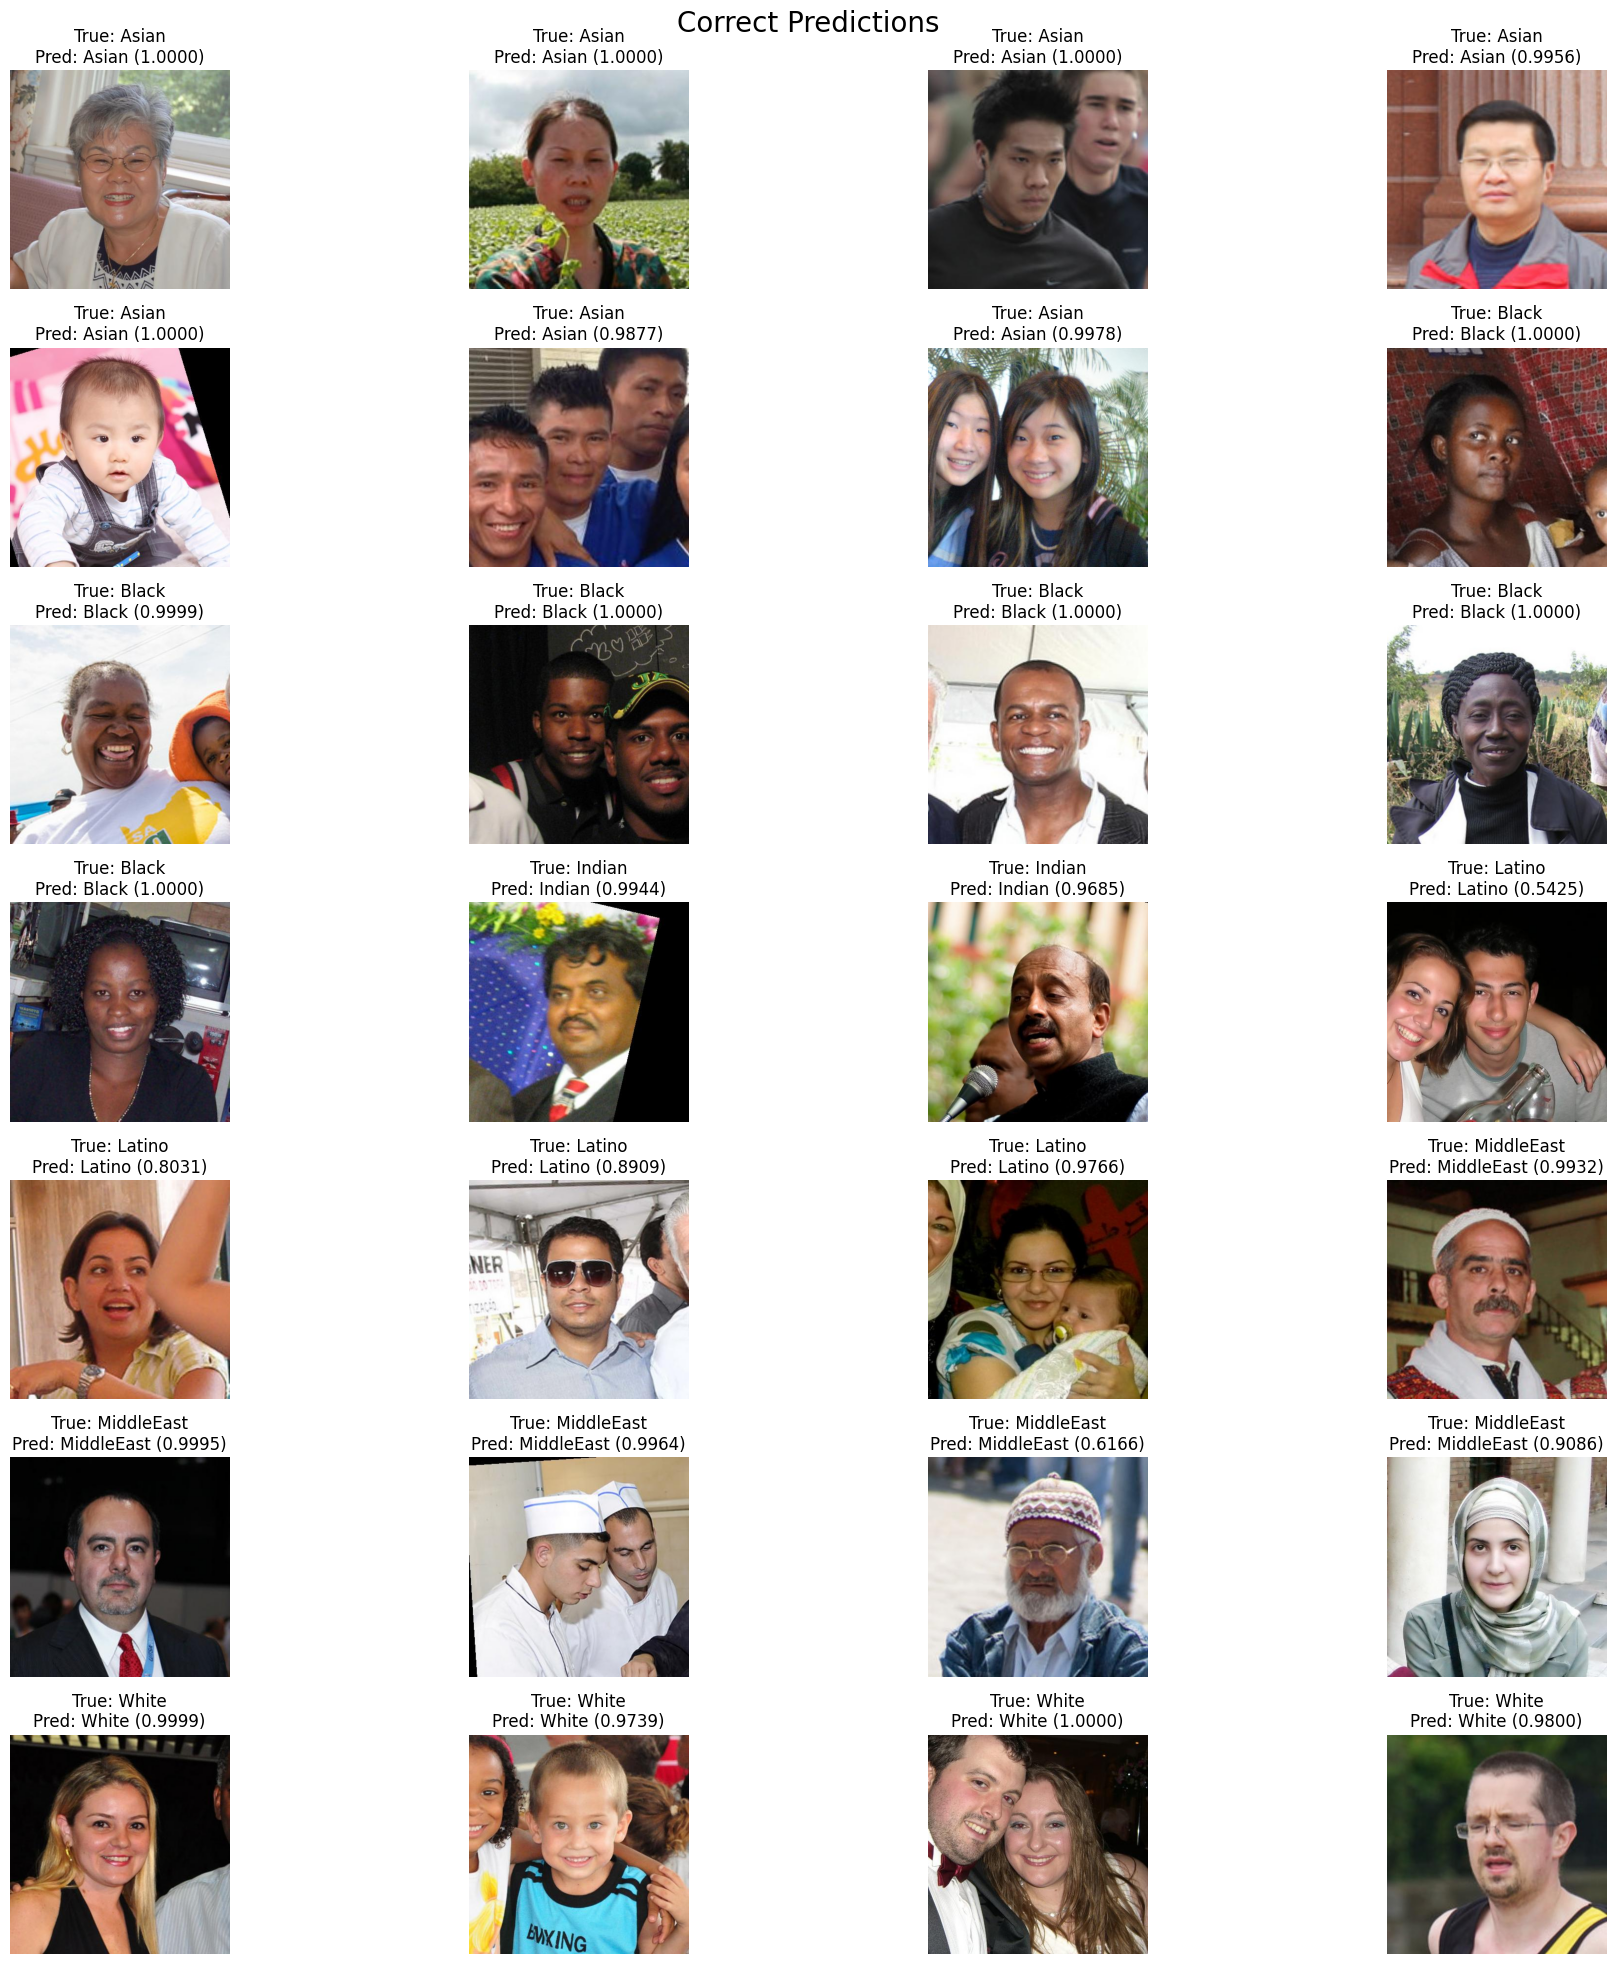

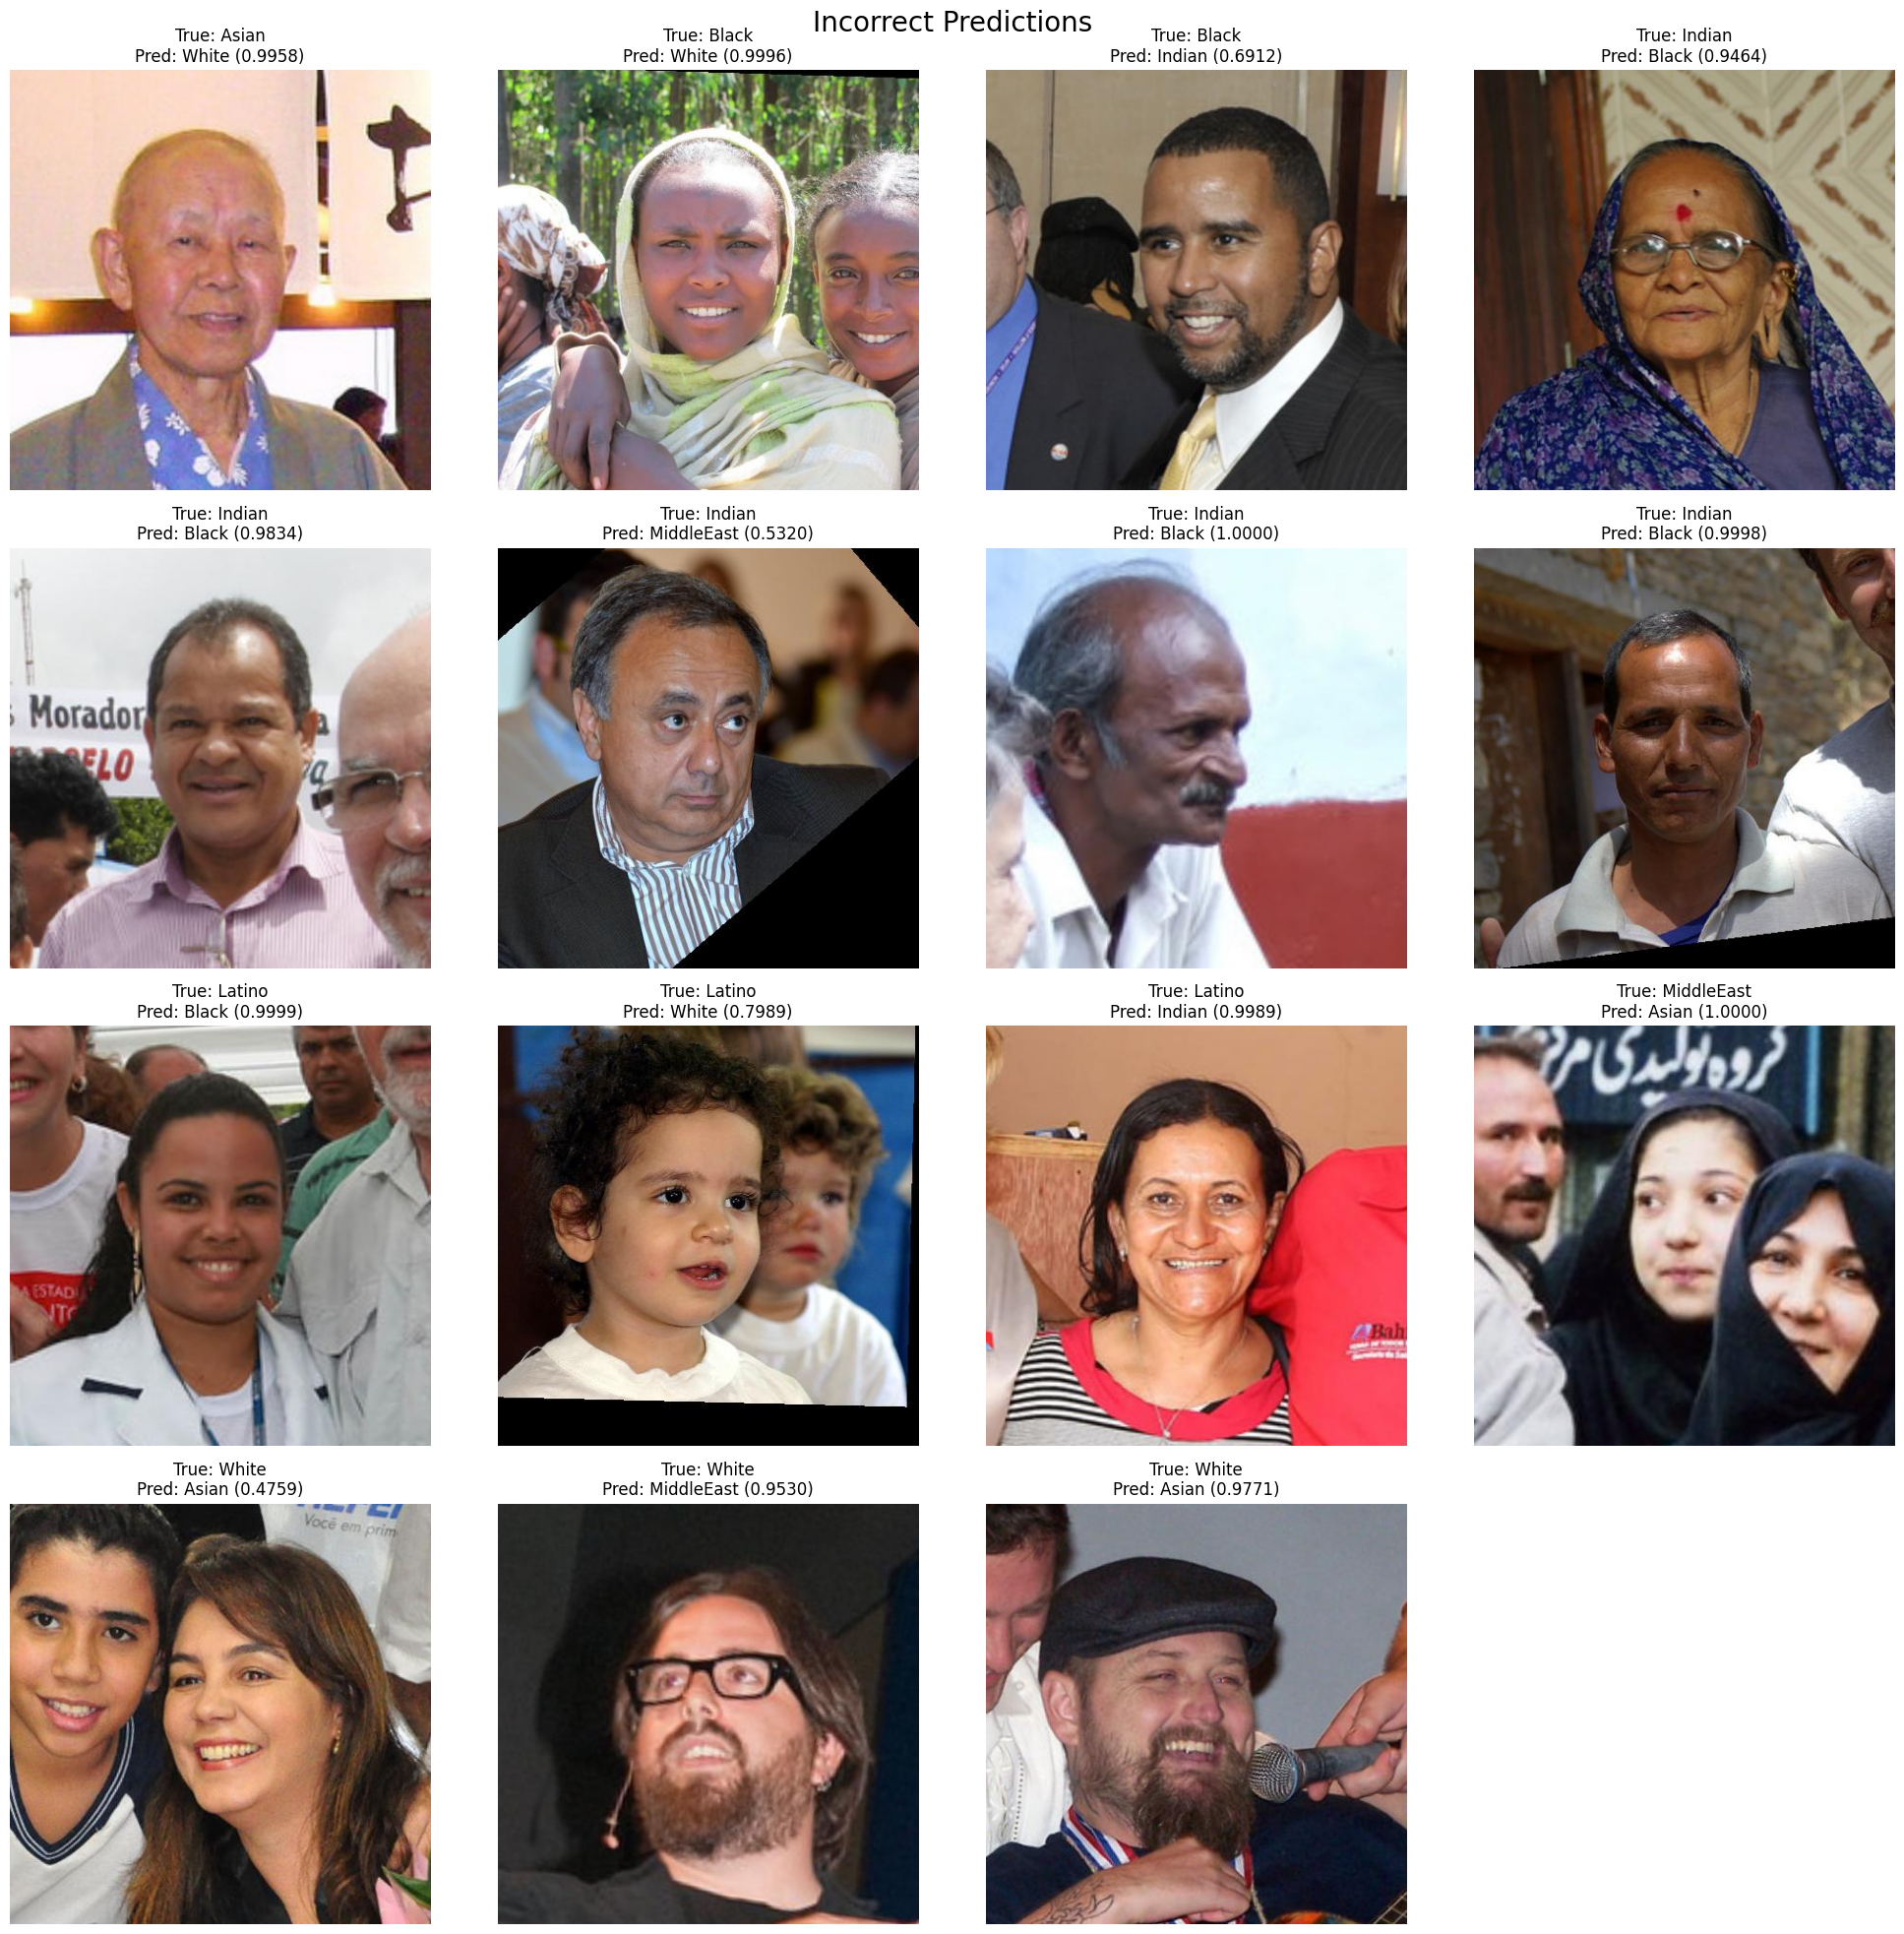

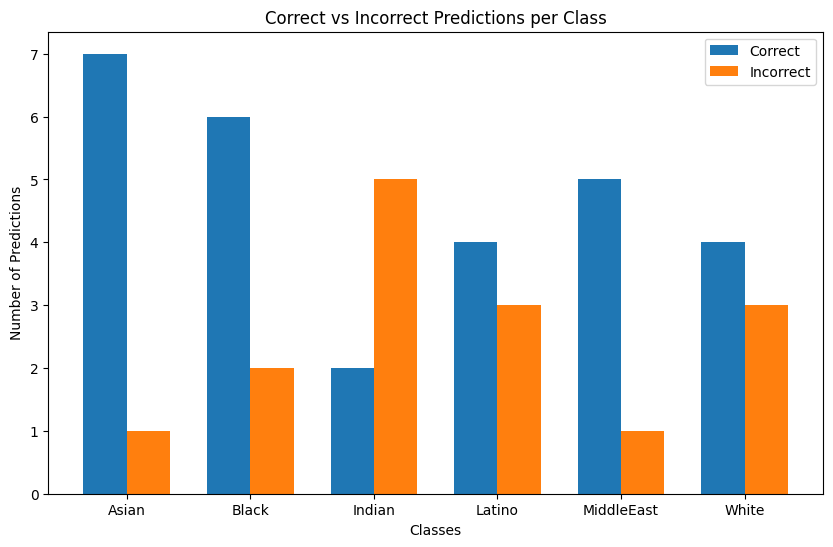

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import UnidentifiedImageError
import math

print("Loading models and setting up ...")

# Load the fine-tuned model silently
model = load_model('EthnicModel.h5', compile=False)

# Define the class names as they were during training
class_names = ['Asian', 'Black', 'Indian', 'Latino', 'MiddleEast', 'White']

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Paths to the test images directory
test_dir = 'test'

# Lists to store image details
correct_predictions = []
incorrect_predictions = []

# Iterate through each class folder in the test directory
for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    if os.path.isdir(class_dir):
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                # Preprocess the image
                processed_image = preprocess_image(img_path)
                # Make a prediction
                predictions = model.predict(processed_image, verbose=0)
                # Get the class with the highest probability
                predicted_class = np.argmax(predictions, axis=1)[0]
                predicted_class_name = class_names[predicted_class]
                # Get the score of the predicted class
                predicted_score = predictions[0][predicted_class]
                
                # Categorize the predictions
                if predicted_class_name == class_name:
                    correct_predictions.append({
                        'image_path': img_path,
                        'true_label': class_name,
                        'predicted_label': predicted_class_name,
                        'predicted_score': predicted_score
                    })
                else:
                    incorrect_predictions.append({
                        'image_path': img_path,
                        'true_label': class_name,
                        'predicted_label': predicted_class_name,
                        'predicted_score': predicted_score
                    })
            except UnidentifiedImageError:
                pass
            except Exception as e:
                pass

# Function to display images in a grid
def display_images(image_details, title):
    num_images = len(image_details)
    cols = 4
    rows = math.ceil(num_images / cols)
    plt.figure(figsize=(20, 20))

    for i, detail in enumerate(image_details):
        try:
            img = image.load_img(detail['image_path'])
            plt.subplot(rows, cols, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"True: {detail['true_label']}\nPred: {detail['predicted_label']} ({detail['predicted_score']:.4f})")
        except UnidentifiedImageError:
            pass
        except Exception as e:
            pass

    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

# Display correct and incorrect predictions in grid view
display_images(correct_predictions, "Correct Predictions")
display_images(incorrect_predictions, "Incorrect Predictions")

# Display bar chart for correct and incorrect predictions
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(class_names))

correct_counts = [sum(1 for x in correct_predictions if x['true_label'] == class_name) for class_name in class_names]
incorrect_counts = [sum(1 for x in incorrect_predictions if x['true_label'] == class_name) for class_name in class_names]

correct_bars = ax.bar(index, correct_counts, bar_width, label='Correct')
incorrect_bars = ax.bar(index + bar_width, incorrect_counts, bar_width, label='Incorrect')

ax.set_xlabel('Classes')
ax.set_ylabel('Number of Predictions')
ax.set_title('Correct vs Incorrect Predictions per Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(class_names)
ax.legend()

plt.show()
